<a href="https://colab.research.google.com/github/chitransh0052/Neural-Network/blob/main/ANN_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN for Regression**

In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.shape

(500, 9)

In [7]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
data.duplicated().sum()

0

In [14]:
data = data.drop('Serial No.', axis=1)

In [15]:
data.shape

(500, 8)

In [17]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

Target (y):
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 7)
X_test shape: (100, 7)
y_train shape: (400,)
y_test shape: (100,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (400, 7)
X_test_scaled shape: (100, 7)


In [21]:
print("Minimum values in X_train_scaled:", np.min(X_train_scaled, axis=0))
print("Maximum values in X_train_scaled:", np.max(X_train_scaled, axis=0))


Minimum values in X_train_scaled: [0. 0. 0. 0. 0. 0. 0.]
Maximum values in X_train_scaled: [1. 1. 1. 1. 1. 1. 1.]


In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled1 = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled1 = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled1.shape)
print("X_test_scaled shape:", X_test_scaled1.shape)
print("Mean of X_train_scaled1:", np.mean(X_train_scaled1, axis=0))
print("Standard deviation of X_train_scaled1:", np.std(X_train_scaled1, axis=0))

print("Minimum values in X_train_scaled1:", np.min(X_train_scaled))
print("Maximum values in X_train_scaled1:", np.max(X_train_scaled))

X_train_scaled shape: (400, 7)
X_test_scaled shape: (100, 7)
Mean of X_train_scaled1: [-1.85629290e-15  1.01252340e-15  1.59872116e-16  1.33226763e-17
  1.77635684e-17 -2.48689958e-16 -3.55271368e-17]
Standard deviation of X_train_scaled1: [1. 1. 1. 1. 1. 1. 1.]
Minimum values in X_train_scaled1: -2.9650705867740816
Maximum values in X_train_scaled1: 2.2299428798748773


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1))  # Output layer with a single neuron for regression


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean squared error loss

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 0.0045 - val_mae: 0.0523
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - mae: 0.0283 - val_loss: 0.0044 - val_mae: 0.0511
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0043 - val_mae: 0.0521
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - mae: 0.0249 - val_loss: 0.0044 - val_mae: 0.0508
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6573e-04 - mae: 0.0220 - val_loss: 0.0043 - val_mae: 0.0506
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8942e-04 - mae: 0.0216 - val_loss: 0.0043 - val_mae: 0.0509
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.9764e-04 - mae: 0.0203 - val_loss: 0.0042 - val_mae: 0.0504
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - mae: 0.0250 - val_loss: 0.0042 - val_mae: 0.0509
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0010 - mae: 0.0234 - val_loss: 0.0041 - val_mae: 0.0487
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0011 - mae: 0.0235 - val_loss: 0.0043 - val_mae: 0.0513
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.1145e-04 - mae: 0.0224 - val_loss: 0.0041 - val_mae: 0.0492
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0010 - mae: 0.0240 - val_loss: 0.0043 - val_mae: 0.0511
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 8.5705e-04 - mae: 0.0220 - val_loss: 0.0046 - val_mae: 0.0548
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8518e-04 - mae: 0.0234 - val_loss: 0.0045 - val_mae: 0.0504
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0011 - mae: 0.0237 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4851e-04 - mae: 0.0225 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/st

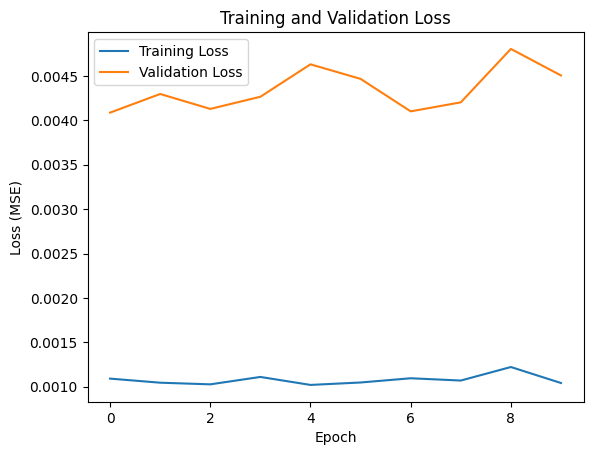

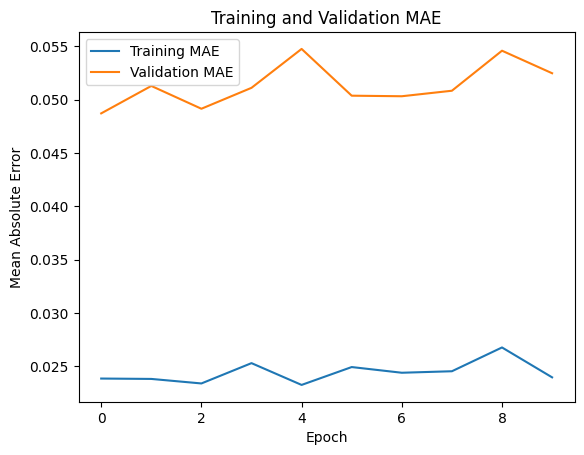

In [47]:
# prompt: plot graph for model

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()


In [52]:
# Predict on new data
y_pred = model.predict(X_test_scaled)

# Print the predictions
print("Predictions:")
y_pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Predictions:


array([[0.90510094],
       [0.7849716 ],
       [0.65417624],
       [0.675631  ],
       [0.78906196],
       [0.85601157],
       [0.5294649 ],
       [0.6492948 ],
       [0.8156034 ],
       [0.7767771 ],
       [0.6306324 ],
       [0.67856294],
       [0.64062685],
       [0.91096985],
       [0.8624905 ],
       [0.51280195],
       [0.8015768 ],
       [0.6578687 ],
       [0.5325632 ],
       [0.5329102 ],
       [0.7581579 ],
       [0.5507371 ],
       [0.75125813],
       [0.7611522 ],
       [0.78779924],
       [0.45766798],
       [0.9306    ],
       [0.81933385],
       [0.625781  ],
       [0.67410004],
       [0.5180716 ],
       [0.6363551 ],
       [0.52959394],
       [0.85554963],
       [0.703282  ],
       [0.7342976 ],
       [0.60232824],
       [0.94645953],
       [0.6368449 ],
       [0.7476652 ],
       [0.94203025],
       [0.6245538 ],
       [0.6887226 ],
       [0.8291125 ],
       [0.9374525 ],
       [0.62650174],
       [0.9174111 ],
       [0.798

In [53]:
# New student data (replace with your actual data)
new_student_data = np.array([[320, 110, 5, 5, 5, 9.5, 1]])

# Scale the new data using the same scaler
new_student_data_scaled = scaler.transform(new_student_data)

# Make the prediction
prediction = model.predict(new_student_data_scaled)

# Print the prediction
print("Predicted Chance of Admit:", prediction[0][0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Chance of Admit: 0.9112156
